# Part 1: ANNs With MNIST Dataset

## Step 1: Download Datasets and Create Data Ingestion

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [20]:
datasets = "../datasets"
mnistTestData = pd.read_csv(f'{datasets}/mnist_test.csv')
mnistTrainingData = pd.read_csv(f'{datasets}/mnist_train.csv')

In [24]:
X_train = mnistTrainingData.iloc[:, :-1]
y_train = mnistTrainingData.iloc[:, 0]
X_test = mnistTestData.iloc[:, :-1]
y_test = mnistTestData.iloc[:, 0]

In [21]:
learning_rates = np.logspace(-4, 0, num=5)
param_grid = {'mlp__learning_rate_init': learning_rates}

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('mlp', MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=20, solver='adam', random_state=1))
])

In [26]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\dev\cp322-asgn3\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('mlp',
                                        MLPClassifier(hidden_layer_sizes=(64,
                                                                          64),
                                                      max_iter=20,
                                                      random_state=1))]),
             n_jobs=-1,
             param_grid={'mlp__learning_rate_init': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             verbose=3)

In [27]:
print("Best learning rate:", grid_search.best_params_['mlp__learning_rate_init'])
print("Best cross-validation score:", grid_search.best_score_)

Best learning rate: 0.001
Best cross-validation score: 0.9498166666666666


In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

y_pred = grid_search.predict(X_test)
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.97      0.93      0.95      1010
           4       0.97      0.95      0.96       982
           5       0.95      0.95      0.95       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.90      0.97      0.93       974
           9       0.92      0.96      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



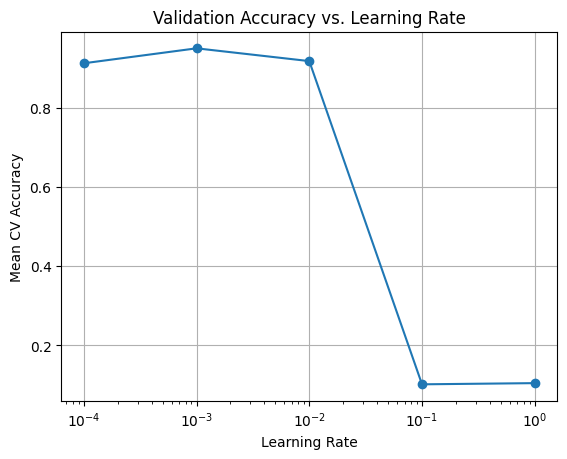

In [29]:
mean_scores = grid_search.cv_results_['mean_test_score']

plt.plot(learning_rates, mean_scores, marker='o')
plt.title("Validation Accuracy vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Mean CV Accuracy")
plt.xscale('log')
plt.grid(True)
plt.show()

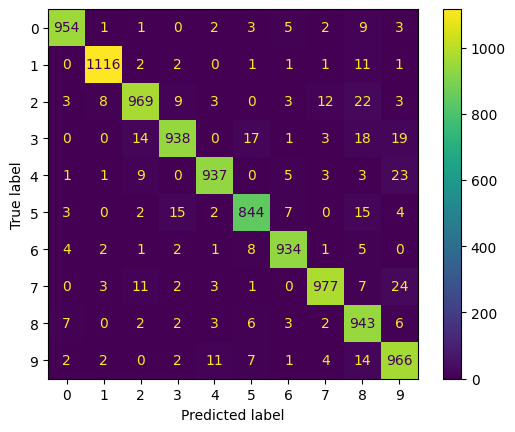

In [39]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()